# 6.5 Unsupervised Machine Learning: Clustering

## Imports

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = r'C:\Users\malac\Downloads\Realtor.com cf'

In [5]:
path

'C:\\Users\\malac\\Downloads\\Realtor.com cf'

In [6]:
df = pd.read_pickle(os.path.join(path, '03 Scripts', 'realtor-dataset-100k.pkl'))

In [7]:
df.head()

,status,price,bed,bath,acre_lot,city,state,house_size,sold_date
0,for_sale,105000,3,2,0,Adjuntas,Puerto Rico,920,0
1,for_sale,80000,4,2,0,Adjuntas,Puerto Rico,1527,0
2,for_sale,67000,2,1,0,Juana Diaz,Puerto Rico,748,0
3,for_sale,145000,4,2,0,Ponce,Puerto Rico,1800,0
5,for_sale,179000,4,3,0,San Sebastian,Puerto Rico,2520,0


# Data Cleaning

In [8]:
df.columns

Index(['status', 'price', 'bed', 'bath', 'acre_lot', 'city', 'state',
       'house_size', 'sold_date'],
      dtype='object')

## I need to drop sold date and status from my analysis of this step. I will do so in a new data frame

In [9]:
df_2 = df.drop(['status', 'sold_date', 'city', 'state',], axis=1)

In [10]:
df_2.head()

,price,bed,bath,acre_lot,house_size
0,105000,3,2,0,920
1,80000,4,2,0,1527
2,67000,2,1,0,748
3,145000,4,2,0,1800
5,179000,4,3,0,2520


# The elbow technique

In [11]:
# Define range for potential clusters 

num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [12]:
# Create algo

score = [kmeans[i].fit(df_2).score(df_2) for i in range(len(kmeans))]

In [13]:
score

[-1.4319084489576326e+16,
 -6509852049780424.0,
 -3983908297212780.0,
 -1958002918354436.5,
 -1183020436868235.8,
 -745886102373690.4,
 -533625905994730.06,
 -387256460679513.9,
 -316729967587491.25]

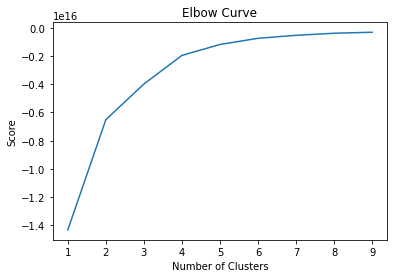

In [14]:
# Plot elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [15]:
# Create kmeans object

kmeans = KMeans(n_clusters = 4, n_jobs = -1)

## I used 4for the number of clusters in my kmeans algorithim because tht is were the graph starts to flatten out.

In [16]:
# Fit kmeans object to data and run algo

kmeans.fit(df_2)

C:\Users\malac\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [17]:
# Create clusters column in df

df['clusters'] = kmeans.fit_predict(df_2)

C:\Users\malac\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [18]:
df.head()

,status,price,bed,bath,acre_lot,city,state,house_size,sold_date,clusters
0,for_sale,105000,3,2,0,Adjuntas,Puerto Rico,920,0,0
1,for_sale,80000,4,2,0,Adjuntas,Puerto Rico,1527,0,0
2,for_sale,67000,2,1,0,Juana Diaz,Puerto Rico,748,0,0
3,for_sale,145000,4,2,0,Ponce,Puerto Rico,1800,0,0
5,for_sale,179000,4,3,0,San Sebastian,Puerto Rico,2520,0,0


In [19]:
# Check values of clusters

df['clusters'].value_counts()

0    8862
3     387
1      57
2       1
Name: clusters, dtype: int64

# Visualizations

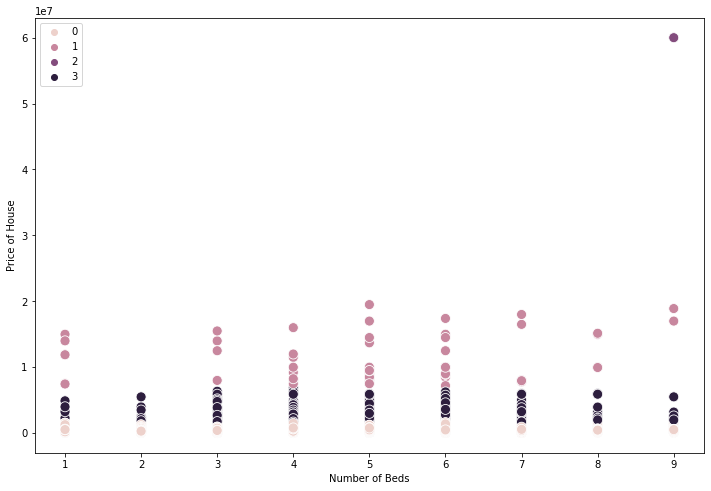

In [20]:
# Plot clusters for beds and price

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['bed'], y=df['price'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Number of Beds')
plt.ylabel('Price of House')
plt.show()

There seem to be more darker colored clusters, the higher the number of bedrooms. 4, 5, and 6 bedrooms seem to have to most expensive houses expect for the outlier in number 9.

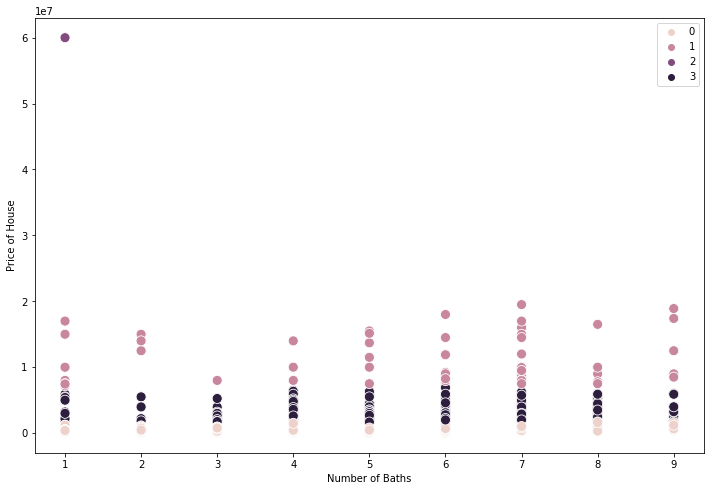

In [21]:
# Plot clusters for baths and price

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['bath'], y=df['price'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Number of Baths')
plt.ylabel('Price of House')
plt.show()

There are more darker clusters the more the number of bathrooms increase. This shows a slight correlation between price and bathrooms.

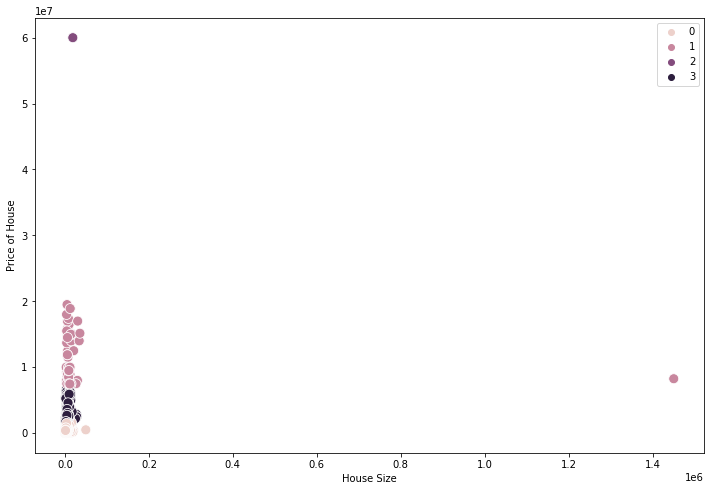

In [22]:
# Plot clusters for beds and price

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['house_size'], y=df['price'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('House Size')
plt.ylabel('Price of House')
plt.show()

The only house in a black cluster is an oultier at the top. However, the graph does not show much correlation between house_size and price. 

In [23]:
# Relabel clusters from numbers to color name

df.loc[df['clusters'] == 3, 'cluster'] = 'black'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'light pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'tan'

In [24]:
# Use groupby to calc descriptive stats of each cluster

df.groupby('cluster').agg({'price':['mean', 'median'],
                           'bed':['mean', 'median'],
                           'bath':['mean', 'median'],
                           'acre_lot':['mean', 'median'],
                           'house_size':['mean', 'median']})

price                   bed             bath         \
                    mean      median      mean median      mean median   
cluster                                                                  
black       2.893935e+06   2500000.0  4.640827    4.0  4.899225    5.0   
light pink  1.126783e+07   9995000.0  5.087719    5.0  5.649123    6.0   
purple      6.000000e+07  60000000.0  9.000000    9.0  1.000000    1.0   
tan         4.127836e+05    339900.0  3.656060    3.0  2.454638    2.0   

              acre_lot           house_size           
                  mean median          mean   median  
cluster                                               
black        18.532300    1.0   5801.485788   5000.0  
light pink   59.000000    1.0  35908.070175   8224.0  
purple      400.000000  400.0  18777.000000  18777.0  
tan          16.167795    0.0   2168.047732   1800.0

## According to the statistics, the black cluster is highest in all the catergories except for bathrooms. Each catergory is in order for most expensive and biggest houses, to cheapest. This shows that the bigger the houseand the more rooms it has, the higher the price of the house. 

In [25]:
df.head()

,status,price,bed,bath,acre_lot,city,state,house_size,sold_date,clusters,cluster
0,for_sale,105000,3,2,0,Adjuntas,Puerto Rico,920,0,0,tan
1,for_sale,80000,4,2,0,Adjuntas,Puerto Rico,1527,0,0,tan
2,for_sale,67000,2,1,0,Juana Diaz,Puerto Rico,748,0,0,tan
3,for_sale,145000,4,2,0,Ponce,Puerto Rico,1800,0,0,tan
5,for_sale,179000,4,3,0,San Sebastian,Puerto Rico,2520,0,0,tan


# Exports

In [28]:
# Export to csv

df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'realtor-dataset-100k.clusters.csv'))